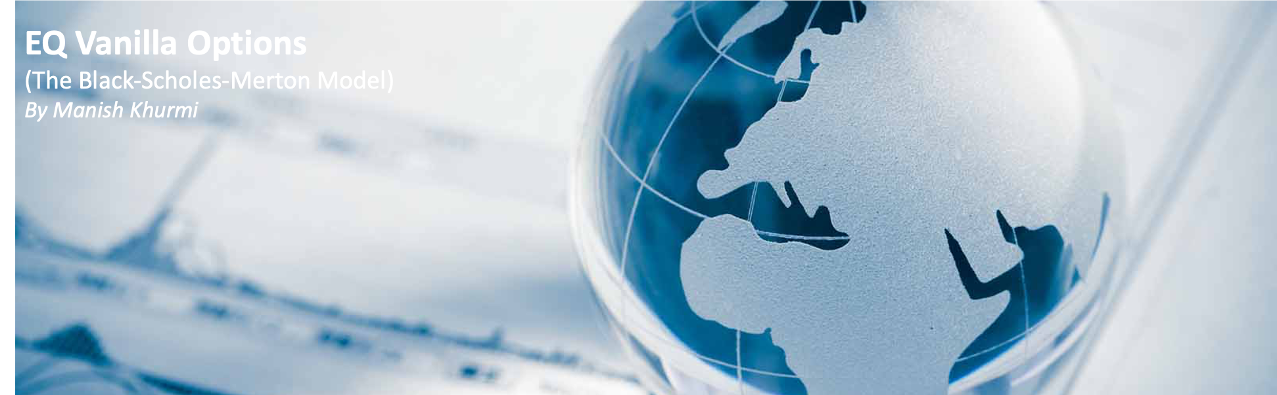

# The Black-Scholes-Merton Model 

Summary: 
    
This is an Interactive App with the goal to give an understanding of option-pricing through a hands-on approach using real world data. Throughout the App you will find widgets that allow you to vary the inputs of the Black-Scholes-Merton model and graphical representations of the outputs of the model. In an effort to see the impact of the chosen variations, towards the end of the notebook, you will find a qualitative explanation of the outputs (Greeks) of the underlying model. 

Please Note that if you are viewing the HTML version (web link) of this App then the widgets will not be functional, I have however inserted pictures of the widgets to show what they look like. If you would like to use the widgets follow the link to my GitHub, where the Notebook and Source Files can be found, this will allow to use the widgets and vary the input stock data in any python environment.

Github Portfolio: 

https://github.com/ManishKhurmi/Coding-Projects-/tree/main/Black%20Sholes%20Merton%20Model%20to%20price%20a%20European%20Option

 ### CONTENTS
 
  0. [Libraries](#Libraries)

1. [Motivation & Background](#Introduction)

   1.2. [Motivation](#motivation)
    
   1.2. [Historical Background](#historical_background)
      
   1.3. [Basic Financial Concepts](#basic_financial_concepts)

 2. [Model Theory and Design ](#options)
 
    2.1. [Option Payoff Functions](#option_payoff_functions)
    
    2.2. [Option Payoff Example](#option_payoff_example)
    
    2.3. [The Black-Scholes-Merton (BSM) Methodology](#methodology)
      
      
 

 3. [Model Development](#model_theory_and_design) 
    
    3.1.[BSM Inputs and Outputs](#model_inputs_and_outputs)
    
    3.2.[BSM Model Application](#model_application)
    
    3.3.[Introducing a Data Set](#data_set)
    
    3.4.[Final Valuation & Greeks ](#valuation)


  4. [Conclusion](#conclusion)
    
  5. [References](#references)
  
  6. [Appendix (Class development and reconciliation](#appendix)

<a id="Libraries"><a/>
## 0. Libraries

In [1]:
# Read before execution
# - Ensure you have all input files 
#     - DowJones.xlsx
#     - Euribor 22_05_2020 extract.xlsx
#     - BSM_output.xlsx
# - Check the "Pip Installation Packages"

In [2]:
#Libraries 

# Maths Packages
import numpy as np
import pandas as pd
import scipy.stats as scs
import math
from math import log, sqrt, pi, exp
from scipy.stats import norm
from datetime import datetime, date
from pandas import DataFrame
from sympy.stats import Normal, cdf
from sympy import init_printing
init_printing()
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['font.family'] = 'serif'
import matplotlib.pyplot as plt

# Widgets
import ipywidgets as widgets
import datetime
from ipywidgets import Layout, Button, VBox, HBox, FloatText, Textarea, Dropdown, Label, IntSlider, Accordion
from traitlets import link
import random
import warnings
warnings.filterwarnings('ignore')


# Graphs
import pandas_datareader.data as web
import plotly.express as px
import plotly.graph_objs as go 
from plotly.subplots import make_subplots



import yfinance as yf
from yahoofinancials import YahooFinancials

# Pip Installation Packages (You may need) 

    # pip install plotly
        # for px 

    # pip install jupyter_contrib_nbextensions
    
    # pip install yfinance 
    
    # pip install jupyter_contrib_nbextensions
    
    # pip install jupyter_contrib_nbextensions
    
    # jupyter nbextension enable <nbextension require path>
    
    # pip install "numpy<1.24"



In [3]:
# Functions 
## define two functions, d1 and d2 in Black-Scholes model
def d1(S,K,T,r,sigma):
    return(log(S/K)+(r+sigma**2/2.)*T) / (sigma*sqrt(T))
def d2(S,K,T,r,sigma):
    return d1(S,K,T,r,sigma)-sigma*sqrt(T)

## define the call options price function
def bs_call(S,K,T,r,sigma):
    return S*norm.cdf(d1(S,K,T,r,sigma))-K*exp(-r*T)*norm.cdf(d2(S,K,T,r,sigma))

## define the put options price function
def bs_put(S,K,T,r,sigma):
    return K*exp(-r*T)-S+bs_call(S,K,T,r,sigma)

## define the Call_Greeks of an option
def call_delta(S,K,T,r,sigma):
    return norm.cdf(d1(S,K,T,r,sigma))
def call_gamma(S,K,T,r,sigma):
    return norm.pdf(d1(S,K,T,r,sigma))/(S*sigma*sqrt(T))
def call_vega(S,K,T,r,sigma):
    return 0.01*(S*norm.pdf(d1(S,K,T,r,sigma))*sqrt(T))
def call_theta(S,K,T,r,sigma):
    return 0.01*(-(S*norm.pdf(d1(S,K,T,r,sigma))*sigma)/(2*sqrt(T)) - r*K*exp(-r*T)*norm.cdf(d2(S,K,T,r,sigma)))
def call_rho(S,K,T,r,sigma):
    return 0.01*(K*T*exp(-r*T)*norm.cdf(d2(S,K,T,r,sigma)))

## define the Put_Greeks of an option
def put_delta(S,K,T,r,sigma):
    return -norm.cdf(-d1(S,K,T,r,sigma))
def put_gamma(S,K,T,r,sigma):
    return norm.pdf(d1(S,K,T,r,sigma))/(S*sigma*sqrt(T))
def put_vega(S,K,T,r,sigma):
    return 0.01*(S*norm.pdf(d1(S,K,T,r,sigma))*sqrt(T))
def put_theta(S,K,T,r,sigma):
    return 0.01*(-(S*norm.pdf(d1(S,K,T,r,sigma))*sigma)/(2*sqrt(T)) + r*K*exp(-r*T)*norm.cdf(-d2(S,K,T,r,sigma)))
def put_rho(S,K,T,r,sigma):
    return 0.01*(-K*T*exp(-r*T)*norm.cdf(-d2(S,K,T,r,sigma)))

### Group the Functions & include "Option Type"
def bsm(option_type, S, K, T, r, sigma):
    
    if option_type == "call":
        return bs_call(S, K, T, r, sigma)
    if option_type == "put":
        return bs_put(S, K, T, r, sigma)
    

def delta(option_type, S, K, T, r, sigma):

    if option_type == "call":
        return call_delta(S, K, T, r, sigma)
    if option_type == "put":
        return put_delta(S, K, T, r, sigma)

def gamma(option_type, S, K, T, r, sigma):

    if option_type == "call":
        return call_gamma(S, K, T, r, sigma)
    if option_type == "put":
        return put_gamma(S, K, T, r, sigma)

def vega(option_type, S, K, T, r, sigma):

    if option_type == "call":
        return call_vega(S, K, T, r, sigma)
    if option_type == "put":
        return put_vega(S, K, T, r, sigma)

def theta(option_type, S, K, T, r, sigma):

    if option_type == "call":
        return call_theta(S, K, T, r, sigma)
    if option_type == "put":
        return put_theta(S, K, T, r, sigma)

def rho(option_type, S, K, T, r, sigma):

    if option_type == "call":
        return call_rho(S, K, T, r, sigma)
    if option_type == "put":
        return put_rho(S, K, T, r, sigma)
    
# Functions for the input dataset 

# Define a function for Tenor boundries 
def tenor(row):
    if 0 < row['Difference (Days)'] <= 3:
        val = '3D'
    elif row['Difference (Days)'] == 4:
        val = '4D'
    elif 4 < row['Difference (Days)'] <= 180:
        val = '6M'
    elif 180 < row['Difference (Days)'] <= 210:
        val = '7M'
    elif 210 < row['Difference (Days)'] <= 240:
        val = '8M'
    elif 240 < row['Difference (Days)'] <= 270:
        val = '9M'
    elif 270 < row['Difference (Days)'] <= 300:
        val = '10M'
    elif 300 < row['Difference (Days)'] <= 330:
        val = '11M'
    elif 330 < row['Difference (Days)'] <= 360:
        val = '1Y'
    elif 360 < row['Difference (Days)'] <= 540:
        val = '1Y6M'
    elif 540 < row['Difference (Days)'] <= 720:
        val = '2Y'
    elif 720 < row['Difference (Days)'] <= 1080:
        val = '3Y'
    else:
        val = 'error'
    return val

# Creating a function to map the Tenors to  Number of Days (Values)
def days(row): 
    if row['Tenor'] == '3D':
        val = 3
    elif row['Tenor'] == '4D':
        val = 4
    elif row['Tenor'] == '6M':
        val = 180
    elif row['Tenor'] == '7M':
        val = 210
    elif row['Tenor'] == '8M':
        val = 240
    elif row['Tenor'] == '9M':
        val = 270
    elif row['Tenor'] == '10M':
        val = 300
    elif row['Tenor'] == '11M':
        val = 330
    elif row['Tenor'] == '1Y':
        val = 360
    elif row['Tenor'] == '1Y6M':
        val = 540
    elif row['Tenor'] == '2Y':
        val = 720
    elif row['Tenor'] == '3Y':
        val = 1080       
    elif row['Tenor'] == '4Y':
        val = 1440
    elif row['Tenor'] == '5Y':
        val = 1800
    elif row['Tenor'] == '6Y':
        val = 2160
    elif row['Tenor'] == '7Y':
        val = 2520
    elif row['Tenor'] == '8Y':
        val = 2880
    elif row['Tenor'] == '9Y':
        val = 3240
    elif row['Tenor'] == '10Y':
        val = 3600   
    elif row['Tenor'] == '11Y':
        val = 3960
    elif row['Tenor'] == '12Y':
        val = 4320
    elif row['Tenor'] == '13Y':
        val = 4680
    elif row['Tenor'] == '14Y':
        val = 5040
    elif row['Tenor'] == '15Y':
        val = 5400
    elif row['Tenor'] == '16Y':
        val = 5760
    elif row['Tenor'] == '17Y':
        val = 6120
    elif row['Tenor'] == '18Y':
        val = 6480    
    elif row['Tenor'] == '19Y':
        val = 6840
    elif row['Tenor'] == '20Y':
        val = 7200
    elif row['Tenor'] == '25Y':
        val = 9000
    elif row['Tenor'] == '30Y':
        val = 10800
    elif row['Tenor'] == '40Y':
        val = 14400
    elif row['Tenor'] == '50Y':
        val = 18000
    else:
        val = 'ERROR'
    return val

<a id="Introduction"><a/>
## 1. Motivation and Background
<a id="motivation"><a/>
### 1.1. Motivation

If options are correctly priced in the Market, it should not be possible to make sure profits by creating portfolios of long and short positions in options and their underlying stocks. Using this principle, a theoretical valuation formula for options is derived. Almost all corporate liabilities can be viewed as combinations of options, the formula and the analysis that led to it are also applicable to corporate liabililities such as common stock, corporate bonds and warrents.

<a id="historical_background"><a/>
### 1.2. Historical Background

In 1973, Fischer Black, Myron Scholes, and Robert Merton achieved a major breakthrough in the pricing of European stock options.This was the development of what has become known as the Black–Scholes–Merton (or Black–Scholes) model. The model has had a huge inﬂuence on the way that trader’s price and hedge derivatives. In 1997, the importance of the model was recognized when Robert Merton and Myron Scholes were awarded the Nobel prize for economics. Sadly, Fischer Black died in 1995; otherwise he too would undoubtedly have been one of the recipients of this prize. 

So how did Black, Scholes, and Merton make their breakthrough? 

Initially Black and Scholes used the capital asset pricing model to determine a relationship between the market’s required return on the option to the required return on the stock. This was not easy because the relationship depends on both the stock price and time. Merton’s approach was diﬀerent from that of Black and Scholes. It involved setting up a riskless portfolio consisting of the option and the underlying stock and arguing that the return on the portfolio over a short period of time must be the risk-free return. Merton’s approach was more general than that of Black and Scholes because it did not rely on the assumptions of the capital asset pricing model.

One of the main incentives behind the model is to hedge the option by buying and selling the underlying asset in just the right way and, as a consequence, to eliminate risk. This type of hedging is called "continuously revised delta hedging" and is the basis of more complicated hedging strategies such as those engaged in by investment banks and hedge funds. Later from the model theory we will see this risk-free conclusion in more detail.

<a id="basic_financial_concepts"><a/>
### 1.3. Basic Financial Concepts

<b> Strike Price: </b>The price in the contract

<b>  Expiration Date: </b>The date in the contract

<b> Option: </b>An option is a contract which gives the buyer (the owner or holder of the option) the right, but not the obligation, to buy or sell an underlying asset or instrument at a specified strike price prior to or on a specified date, depending on the form of the option.The strike price may be set by reference to the spot price (market price) of the underlying security or commodity on the day an option is taken out, or it may be fixed at a discount or at a premium. The seller has the corresponding obligation to fulfill the transaction – to sell or buy – if the buyer (owner) "exercises" the option.

<b> Call Option: </b>A call option gives the holder the right to buy the underlying asset by a certain date for a certain price.

<b> Put Option: </b> A put option gives the holder the right to sell the underlying asset by a certain date for a certain price

<b> European options: </b>Options that can be exercised only on the expiration date itself

<b> American options: </b>Options that can be exercised at any time up to the expiration date


<a id="options"><a/>
## 2. Model Theory and Design 
<a id="option_payoff_functions"><a/>
### 2.1. Option Payoff Functions

In general, the payoff from a long position in a forward contract on one unit of an
asset is

   \begin{equation}
        \ S_T - K
   \end{equation} 
   
where $K$ is the strike price and $S_T$ is the stock price of the asset at maturity of the
contract. This is because the holder of the contract is obligated to buy an asset worth $S_T$
for $K$. Similarly, the payoff from a short position in a forward contract on one unit of
an asset is

   \begin{equation}
        \  K - S_T 
   \end{equation} 
   
   For a European call option on an index with strike 8,000 and index level of 8,200
at maturity, the option holder receives the difference 8,200 − 8,000 = 200 (e.g. in EUR or
USD) from the option writer. If the index level is below the strike, say at 7,800, the option
expires worthless and the writer does not have to pay anything. We can formalise this via
the so-called inner value (or intrinsic value or payoff)—from the holder’s viewpoint—of
the option: 

 \begin{equation}
        \ h_t(S,K) = max[S_t - K, 0]
   \end{equation} 

<a id="option_payoff_example"><a/>
### 2.2. Option Pay-off Example

The code in this section creates widgets in order to vary the inputs of the Black-Scholes model. The output of the chosen scenario creates the Pay-off graph for the selected option types.

The inputs are as follows: 
- Underlying:  the underlying stock of the selected company 
- Option Style: European
- Option Type: Call / Put
- Methodology: the pricing methodology applied for the option valuation
- Strike

$(ITM)$ In-the-money: a call (put) is in-the-money if $S > K (S < K)$
 
$(ATM)$ At-the-money: an option, call or put, is at-the-money if $S ≈ K$
 
$(OTM)$ Out-of-the-money: a call (put) is out-of-the-money if $S < K (S > K)$


In [4]:
# Companies in the Dowjones 
input_file_index = pd.read_excel("DowJones.xlsx", header = None)

# If you want to check the list of Companies in the DowJones Index 
    # names_list = input_file_index[0].tolist()
    # names_list
    
input_file_index.head()

,0,1
0,The Procter & Gamble Company,PG
1,Johnson & Johnson,JNJ
2,"The Home Depot, Inc.",HD
3,"Cisco Systems, Inc.",CSCO
4,UnitedHealth Group Incorporated,UNH


In [5]:
# Initial Selection
# Dropdown Widgets
form_item_layout = Layout(
    display='flex',
    flex_flow='row',
    justify_content='space-between'
)

input_file_index = pd.read_excel("DowJones.xlsx", header = None)
names_list = input_file_index[0].tolist()

ticker_list = input_file_index[1].tolist()

EQ_ticker_dict = {}
for name in names_list: 
    for ticker in ticker_list: 
        EQ_ticker_dict[name] = ticker 
        ticker_list.remove(ticker) 
        break
        
dow_jones = names_list
option_type =['Call', 'Put']

underlying_wid = widgets.Dropdown(options=dow_jones, value = 'Apple Inc.')
deal_wid = widgets.Dropdown(options=['Buy', 'Sell'])
type_wid = widgets.Dropdown(options=option_type)
start_wid = widgets.DatePicker(date= '02/02/2020' , disabled=False)

form_items = [
    VBox([Label(value='Underlying'), underlying_wid], layout=form_item_layout),
  # VBox([Label(value='Deal Type'), deal_wid], layout=form_item_layout),
    VBox([Label(value='Option Type'), type_wid], layout=form_item_layout),
  # VBox([Label(value='Start Date'), start_wid], layout=form_item_layout),
]

form = VBox(form_items, layout=Layout(
    display='flex',
    flex_flow='column',
    align_items='stretch',
    width='45%'
))


form

In [6]:
# Underlying Strike
u = underlying_wid.value 

#Cleaning data
start_date = datetime.datetime(2018, 6, 1)
end_date   = datetime.datetime(2020, 6, 1)

share_series = yf.download(EQ_ticker_dict[u], start=start_date, end=end_date, progress=False,).drop(['High',
                                                                                                    'Close',
                                                                                                    'Low',
                                                                                                    'Open',
                                                                                                    'Volume'], axis=1)

u_min = pd.Series(share_series['Adj Close']).min()
u_max = pd.Series(share_series['Adj Close']).max()
u_random = random.randint(int(u_min), int(u_max))

strike_wid =IntSlider(value=u_random,min=u_min, max=u_max, step=1)
HBox([Label(value=u+' Strike:'), strike_wid])

In [8]:
# Pay-off Function using the above Strike 
k = strike_wid.value
s = np.linspace(u_min,u_max,100)
df_graph_1 = pd.DataFrame(s)

# Graphing the Pay-off Function
def payoff_graph(deal_type, option_type, s, k):
        
    for i in deal_type:
        if deal_type == 'Call':
            for j in option_type:
                if option_type == 'Buy':
                    option_payoff = np.maximum(s-k,0)
                else:
                    option_payoff = -np.maximum(s-k,0)
        else:
            for j in option_type:
                if option_type == 'Buy':
                    option_payoff = np.maximum(k-s,0)
                else:
                    option_payoff = -np.maximum(k-s,0)
        return(option_payoff)
      
option_payoff=payoff_graph(type_wid.value ,deal_wid.value, s, k)    
    
df_graph_1['Payoff'] = option_payoff 
#df_graph_1.index = df_graph_1['Payoff']
#df_graph_1.drop('Payoff', axis=1, inplace=True)
df_graph_1.rename(columns={0: 'Spot Price'}, inplace=True)
df_graph_1.tail()

#Change color of the line > dir(px.colors.qualitative)
fig = px.line(df_graph_1, 
              x='Spot Price', 
              y='Payoff',
              color_discrete_sequence=px.colors.qualitative.Light24
             )

#color scheme > https://www.rapidtables.com/web/color/RGB_Color.html
fig.update_layout(title={'text':'European Option Pay-off Profile for '
                         + u 
                         + ' ['
                         + EQ_ticker_dict[u]
                         + ']',
                         'y':0.925,
                         'x':0.5,
                         'xanchor': 'center',
                         'yanchor': 'top'},
                  font=dict(family="Times New Roman",
                            size=12,
                            color="#7f7f7f"
                           ),
                  width=900, 
                  height=450, 
                  plot_bgcolor='rgb(250,255,255)', 
                  xaxis=dict(showgrid=False, 
                             zeroline=False,
                             linecolor='grey', 
                             mirror=True, 
                             linewidth=2),
                  yaxis=dict(showgrid=False, 
                             zeroline=True,
                             zerolinewidth=1,
                             zerolinecolor='grey',
                             linecolor='grey', 
                             mirror=True, 
                             linewidth=2,
                             )
                 )
fig.show()

<a id="methodology"><a/>
### 2.3. The Black-Scholes-Merton (BSM) Theory & Methodology 

The Black–Scholes-Merton (BSM) model is a mathematical model simulating the dynamics of a financial market containing derivative financial instruments such as options, futures, forwards and swaps. The key property of the model is that it shows that an option has a unique price regardless of the risk of the underlying security and its expected return. The model is based on a partial differential equation (PDE), the so-called Black-Scholes equation, from which one can deduce the Black-Scholes formula, which gives a theoretical estimate of the correct price of European stock options. This notebook will focus on the original model, the basis for all other models.

### The BSM Partial Differential Equation

The following partial differential equation represents the evolution of a European Call or European Put option on an underlying stock paying no dividends (under the BSM model).

   \begin{equation} 
	 \frac{\partial \mathrm V}{ \partial \mathrm S } + \frac{1}{2}\sigma^{2} \mathrm S^{2} \frac{\partial^{2} \mathrm V}{\partial \mathrm S^2}
	+  \frac{\partial \mathrm V}{\partial \mathrm t}\ -\mathrm r \mathrm V = 0
	\label{eq:1}
\end{equation} 


Where:

$V$ is the call option price 

$S$ is the current  stock price

$\sigma$ is the volatility 

$r$ is the risk-free interest rate 

$t$ is the time to maturitiy (in years)

The key financial insight behind the equation is that, under the model assumption of a frictionless market, one can perfectly hedge the option by buying and selling the underlying asset in just the right way and consequently “eliminate risk". This hedge, in turn, implies that there is only one right price for the option, as returned by the Black–Scholes formula.

For interpretation we re-arranging the PDE to obtain the following:


   \begin{equation} 
	       \frac{\partial \mathrm V}{\partial \mathrm t}\ + \frac{1}{2}\sigma^{2} \mathrm S^{2} \frac{\partial^{2} \mathrm V}{\partial \mathrm S^2}
	 = \mathrm r \mathrm V - \frac{\partial \mathrm V}{ \partial \mathrm S }
\end{equation} 

The left side represents the change in the value/price of the option V due to time t increasing + the convexity of the option’s value relative to the price of the stock. 

The right hand side represents the risk-free return from a long position in the option and a short position consisting of $∂V/∂S$ shares of the stock.

### The BSM Formula

The Black-Scholes formula is a solution to the Black-Scholes PDE, given the boundary conditions see reference [1]. It calculates the price of European put and call options

\begin{equation}
	\mathrm C(S,K,t,T,r,\sigma)= \mathrm N(\mathrm d_1)\mathrm S - \mathrm N(\mathrm d_2) \mathrm K \mathrm e^{-rt}
	\label{eq:2}
\end{equation}

\begin{equation}
	N(x)=\frac{1}{\sqrt{2\pi}} \int_{-\infty}^{x} \mathrm e^{-\frac{1}{2}z^2} dz
	\label{eq:5}
\end{equation}

\begin{equation}
	\mathrm d_1= \frac{1}{\sigma \sqrt{\mathrm t}} \left[\ln{\left(\frac{S}{K}\right)} + t\left(r + \frac{\sigma^2}{2} \right) \right]
\end{equation}

\begin{equation}
	\mathrm d_2= \frac{1}{\sigma \sqrt{\mathrm t}} \left[\ln{\left(\frac{S}{K}\right)} + t\left(r - \frac{\sigma^2}{2} \right) \right]
\end{equation}

Additionally we can simplyfy $d_2$ into the following 

\begin{equation}
	\mathrm d_2= \mathrm d_1 - \sigma \sqrt{T}
\end{equation}

where: 

- $C$ is the value of the option
- $S$ is the stock/index level at time t
- $K$ is the Strike Price
- $t$ is the valuation date (in years)
- $T$ is the date of maturity/time-to-maturity if t = 0; T > t
- $r$ is the risk-free interest rate (a number between 0 and 1)
- $\sigma$ is the volatility of the underlying stock
- $N$ is the normal cumulative distribution function 

    

### The Greeks: Theory & Methodology

In particular for hedging and risk management purposes, it is of importance to know how option
values change with marginal changes in a model parameters. 

Options Greeks are important indicators for assessing the degree of risk coming from exogenous variables, in fact, they measure option premium’s sensitivities to small changes in different parameters. Mathematically, Greeks are the partial derivatives of the option price with respect to different factors such as volatility, interest rate and time decay.

The **delta** is the first partial derivative of the BSM Formula. It measures the sensitiveness of the option’s price to a $1 fluctuation in the underlying asset price.

\begin{equation}
    \Delta = \frac{\partial\mathrm C}{\partial \mathrm S } = N(d_1)
\end{equation}

The **gamma** is the second partial derivative with respect to the index level. It  measures Delta’s sensitivity to a $1 movement in the underlying asset price and it is identical for both call and put options.

\begin{equation}
    \Gamma = \frac{\partial^{2} \mathrm C}{\partial \mathrm S^2}
    = \frac{N'(d_1)}{S \sigma \sqrt{T - t}}
\end{equation}  

The **theta** of an option, by convention, is the negative first partial derivative with respect to time-to-maturity $t^* = T - t$ . Theta measures option’s sensitivity to a small change in time to maturity (T). As time to maturity is always decreasing it is normal to express Theta as negative partial derivatives of the option price with respect to T. Theta represents the time decay of option prices in terms of a 1 year move in time to maturity and to view the value of Theta for a 1 day move we should divide it by 365 or 252 (the number of trading days in one year)

\begin{equation}
    \Theta = \frac{\partial\mathrm C}{\partial \mathrm t^* } =
    -\frac{SN'(d_1) \sigma}{2 \sqrt{T - t}}
   -re^{-r(T-t)} K N(d_2)
\end{equation}  



The **rho** of an option is the first partial derivative with respect to the short rate **r** i.e. the option’s sensitivity to a change in the risk-free interest rate

\begin{equation}
    \rho = 
    \frac{\partial\mathrm C}{\partial \mathrm r}
    = K(T - t)e^{-r(T-t)} N(d_2)
\end{equation}  

The **vega** is the first partial derivative with respect to the volatility $\sigma$. It is the option’s sensitivity to a 1% movement in implied volatility and it is identical for both call and put options.

\begin{equation}
    V = 
    \frac{\partial\mathrm C}{\partial \mathrm \sigma}
    = SN'(d_1)\sqrt{T - t}
\end{equation}  

### The risk-free conclusion 

The key observation of Black and Scholes (1973) was that the risk-free return of the combined portfolio of stocks and options on the right hand side over any infinitesimal time interval could be expressed as the sum of theta ($\Theta$) and a term incorporating gamma ($\Gamma$). The observation is sometimes known as the “risk neutral argument”. This because the value of theta ($\Theta$) is typically negative (because the value of the option decreases as time moves closer to expiration) and the value of gamma ($\Gamma$) is typically positive (reflecting the gains the portfolio receives from holding the option). In sum, the losses from theta and the gains from gamma offset one another, resulting in returns at a risk-free rate.

<a id="model_theory_and_design"><a/>
# 3. Model Development
<a id="model_inputs_and_outputs"><a/>
### 3.1. Model Inputs & Outputs 

### Assumptions of the Model 

1. The instantaneous log return of the risky asset’s price is assumed to behave as an infinitesimal random walk with
    constantdrift and volatility, more precisely, according to geometric Brownian motion. The mean (µ) and the standard
    deviation (σ) is constant.
2. The short selling of securities with full use of proceeds is permitted. 
3. There are no transactions costs or taxes. All securities are perfectly divisible. 
4. There are no dividends during the life of the derivative. 
5. There are no riskless arbitrage opportunities. 
6. Security trading is continuous. 
7. The risk-free rate of interest, r, is constant and the same for all maturities.

    - Assumptions about the assets in the market are 1,4 & 7
    - Assumptions about the market itself are 2,3,5 & 6 
    
### Inputs

- $S$ is the current  stock price
- $K$ is the Strike Price of the option
- $r$ is the risk-free interest rate (a number between 0 and 1)
- $t$ is the time to maturitiy (in years)
- $N$ is the normal cumulative distribution function 
- $\sigma$ is the volatility of the underlying stock

### Outputs
 
The Premium 
- Value of the Option 

The cumulative density function of the normal distribution N(.)
- $N(d2)$: risk-adjusted probability that the option will be exercised.
- $N(d1)$: probability of receiving the stock at expiration of the option.

The Greek letters
- Delta ($\Delta$): The rate of change of the option price respected to the rate of the change of underlying asset price.
- Gamma ($\Gamma$): The rate of change of delta respected to the rate of change of underlying asset price.
- Vega ($V$): The rate of change of the option price respected to the volatility of the underlying asset.
- Rho ($\rho$): The rate of the option price respected to the interest rate.
- Theta ($\Theta$): The rate of change of the option price respected to the passage of time.

<a id="model_application"><a/>
### 3.2. BSM Model Application 

Linear interpolation uses a linear function for each of intervals (in our case this will be strike). On the other hand, Spline interpolation uses low-degree polynomials in each of the intervals and chooses the polynomial pieces such that they fit smoothly together.

To begin we will use a standard format for option pricing data. 
Here the data is organised first by the Strike (K). The remaining columns represent the input-varibales we will use to deduce the calculated variables for the final valuation

In [9]:
# Fist Glance of Input Data 
input_file_yahoo = pd.read_excel('Options Data Set EQ Vanilla AAPL v2.xlsx', 
                                 sheet_name='Final').drop(['risk-free rate (r) ',
                                                           'Contract Name',
                                                           'Last Trade Date',
                                                           'Last Price', 
                                                           'Bid',
                                                           '% Change', 
                                                           'Volume',
                                                           'Ask',
                                                           'Change', 
                                                           'Open Interest']
                                                          , axis=1)

input_file_yahoo.head()

,Underlying,Option Type,Spot Date (t),Expiration Date (T),Spot Price (S0),Strike (K),Implied Volatility (sigma)
0,AAPL,Call,2020-05-20,2020-05-22,325,125.0,3.8828
1,AAPL,Call,2020-05-20,2020-05-22,325,150.0,3.3027
2,AAPL,Call,2020-05-20,2020-05-22,325,155.0,3.1973
3,AAPL,Call,2020-05-20,2020-05-22,325,160.0,3.1426
4,AAPL,Call,2020-05-20,2020-05-22,325,165.0,2.8906


In [10]:
# Creating Tenors & BSM Variables

input_file_yahoo = pd.read_excel('Options Data Set EQ Vanilla AAPL v2.xlsx', 
                                 sheet_name='Final').drop(['risk-free rate (r) ',
                                                           'Contract Name',
                                                           'Last Trade Date',
                                                           'Last Price', 
                                                           'Bid',
                                                           '% Change', 
                                                           'Volume',
                                                           'Ask',
                                                           'Change', 
                                                           'Open Interest']
                                                          , axis=1)
input_file_yahoo.set_index('Strike (K)')
# Additonal Columns we need 

# Difference (Days)
input_file_yahoo['Difference (Days)'] = ((input_file_yahoo['Expiration Date (T)'] 
                                          - input_file_yahoo['Spot Date (t)']).dt.days)

# Maturity (Years)
input_file_yahoo['Maturity'] = input_file_yahoo['Difference (Days)']/360
# Obtaing % Volatility 
input_file_yahoo['Volatility_%'] = (input_file_yahoo['Implied Volatility (sigma)'])/100
# Currency
input_file_yahoo['Currency'] = 'USD'
#Tenors 
input_file_yahoo['Tenor'] = input_file_yahoo.apply(tenor, axis = 1)

tenors = input_file_yahoo['Tenor'].tolist()
tenors = list(dict.fromkeys(tenors))

strikes = input_file_yahoo['Strike (K)'].tolist()
strikes = list(dict.fromkeys(strikes))

input_file_curve = pd.read_excel('Euribor 22_05_2020 extract.xlsx', 
                                 sheet_name = "Tenors").drop(['Shifted',
                                                              'Discount',
                                                              'Date'],
                                                             axis=1,
                                                            )

input_file_yahoo.head()

intro_df = input_file_yahoo.set_index("Strike (K)")
intro_df

,Underlying,Option Type,Spot Date (t),Expiration Date (T),Spot Price (S0),Implied Volatility (sigma),Difference (Days),Maturity,Volatility_%,Currency,Tenor
Strike (K),,,,,,,,,,,
125.0,AAPL,Call,2020-05-20,2020-05-22,325,3.8828,2,0.005556,0.038828,USD,3D
150.0,AAPL,Call,2020-05-20,2020-05-22,325,3.3027,2,0.005556,0.033027,USD,3D
155.0,AAPL,Call,2020-05-20,2020-05-22,325,3.1973,2,0.005556,0.031973,USD,3D
160.0,AAPL,Call,2020-05-20,2020-05-22,325,3.1426,2,0.005556,0.031426,USD,3D
165.0,AAPL,Call,2020-05-20,2020-05-22,325,2.8906,2,0.005556,0.028906,USD,3D
...,...,...,...,...,...,...,...,...,...,...,...
450.0,AAPL,Put,2020-05-20,2022-06-17,325,0.4476,758,2.105556,0.004476,USD,3Y
460.0,AAPL,Put,2020-05-20,2022-06-17,325,0.2996,758,2.105556,0.002996,USD,3Y
470.0,AAPL,Put,2020-05-20,2022-06-17,325,0.2979,758,2.105556,0.002979,USD,3Y


In [11]:
# Creating the Widget VBox
underlying_wid2 = widgets.Dropdown(options=dow_jones,
                     layout=Layout(flex='1 1 auto', width='31%'),
                     value='Apple Inc.',
                     description='Underlying:',
                     disabled=False)
model_wid = widgets.Dropdown(options=['Black-Scholes', 'Binomial', 'Montecarlo'], 
                   layout=Layout(flex='1 1 auto', width='auto'),
                   value='Black-Scholes', 
                   description='Model:', 
                   disabled=False)
valuation_wid = widgets.DatePicker(description='Valuation Date:',
                       layout=Layout(flex='1 1 auto', width='auto'),
                       datetime ='30-05-2020',
                       disabled=False)
position_wid = widgets.RadioButtons(options=['Buy', 'Sell'], 
                   layout=Layout(flex='1 1 auto', width='8%'),
                   value='Buy', 
                   description='Position:', 
                   disabled=False)
optype_wid = widgets.Dropdown(options=['Call', 'Put'], 
                   layout=Layout(flex='1 1 auto', width='14%'),
                   value='Call', 
                   description='Option Type:', 
                   disabled=False)
optstyle_wid = widgets.Dropdown(options=['European', 'American', ],
                     layout=Layout(flex='1 1 auto', width='20.5%'),
                     value='European',
                     description='Option Style:',
                     disabled=False,)
nominal_wid = widgets.FloatText(value=1000000.00,
                      layout=Layout(flex='1 1 auto', width='25%'),
                      description='Nominal:',
                      disabled=False)

start_wid = widgets.DatePicker(description='Start Date:',
                       layout=Layout(flex='1 1 auto', width='35.5%'),
                       disabled=False)
expiration_wid = widgets.Dropdown(options=tenors,
                     layout=Layout(flex='1 1 auto', width='27.5%'),
                     value='8M',
                     description='Expiration:',
                     disabled=False)
strike_wid1 = widgets.Dropdown(options=strikes, 
                   layout=Layout(flex='1 1 auto', width='31%'),
                   value=260.0, 
                   description='Strike:', 
                   disabled=False)
rfr_wid = widgets.FloatText(value=0.250,
                     layout=Layout(flex='3 1 auto', width='auto'),
                      description='Risk Free:',
                      disabled=False)
interpolation_wid = widgets.Dropdown(options=['nearest', 'zero', 'slinear', 'quadratic', 'cubic', 'spline', 'barycentric', 'polynomial'], 
                     layout=Layout(flex='1 1 auto', width='auto'),
                     value='spline', 
                     description='Interpolation:', 
                     disabled=False)
vol_wid = widgets.Dropdown(options=['Statistical(%)', 'Market Surface(%)'], 
                     layout=Layout(flex='1 1 auto', width='auto'),
                     value='Market Surface(%)', 
                     description='Volatility:', 
                     disabled=False)    
volvalue_wid = widgets.FloatText(value=25,
                       layout=Layout(flex='3 1 auto', width='auto'),
                       disabled=False)
prem_wid = widgets.FloatText(value=0.5,
                     layout=Layout(flex='3 1 auto', width='24%'),
                      description='Premium ($):',
                      disabled=False)
dividend_wid = widgets.Dropdown(options=['Historical(%)', 'Forecast(%)'], 
                     layout=Layout(flex='1 1 auto', width='23%'),
                     value='Historical(%)', 
                     description='Dividend:', 
                     disabled=False)    
dividendvalue_wid = widgets.FloatText(value=1.15,
                       layout=Layout(flex='3 1 auto', width='14.5%'),
                       disabled=False)
    
        

items_0 = [underlying_wid2, model_wid, valuation_wid]

items_1 = [position_wid,optype_wid,optstyle_wid,nominal_wid]

items_2 = [start_wid,expiration_wid,strike_wid1]


#items_3 = [
#    widgets.FloatText(value=-0.245,
#                      layout=Layout(flex='3 1 auto', width='auto'),
#                      description='Strike:',
#                      disabled=False),
#    widgets.Dropdown(options=['Market', 'Historical'], 
#                   layout=Layout(flex='3 1 auto', width='auto'),
#                   value='Market', 
#                   description='Volatility:', 
#                   disabled=False),
#    ]

items_4 = [rfr_wid,interpolation_wid, vol_wid, volvalue_wid]

items_5 = [prem_wid,dividend_wid,dividendvalue_wid]

box_layout = Layout(display='flex',
                    flex_flow='row',
                    align_content='flex-start',
                    align_items='flex-start',
                    width='100%')

box_0 = VBox(children=items_0, layout=box_layout)
box_1 = VBox(children=items_1, layout=box_layout)
box_2 = VBox(children=items_2, layout=box_layout)
#box_3 = VBox(children=items_3, layout=box_layout)
box_4 = VBox(children=items_4, layout=box_layout)
box_5 = VBox(children=items_5, layout=box_layout)

option_main_data = [box_0, box_1, box_2]
reference_rate = [box_4, box_5]

control_panel = [
    widgets.VBox(option_main_data),
    widgets.VBox(reference_rate),
]   
    
accordion = Accordion(children=control_panel)
accordion.set_title(0, 'Option Main Data')
accordion.set_title(1, 'Interest Rates, Dividends & Volatility')
accordion

Accordion(children=(VBox(children=(VBox(children=(Dropdown(description='Underlying:', index=27, layout=Layout(…

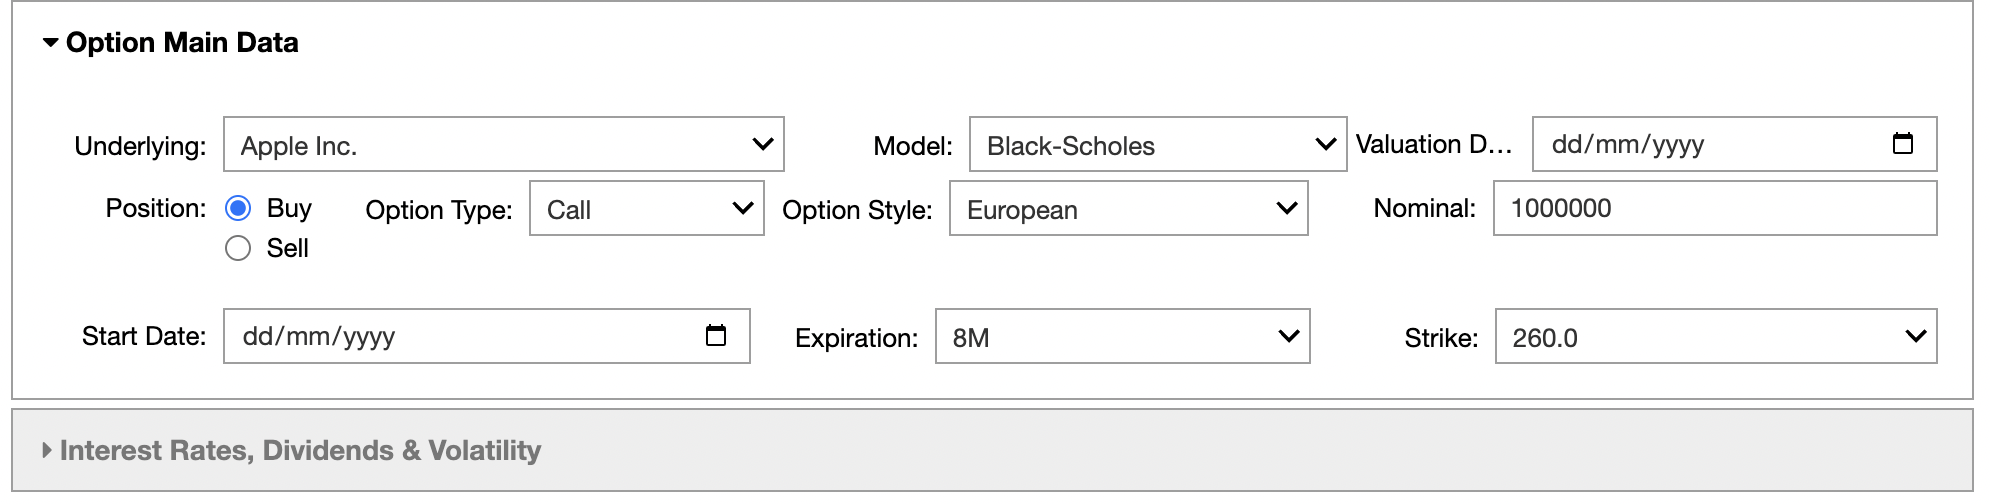



In [12]:
# Creating Variables based on Widget Inputs 

#Apply Days function to map Tenor(s) to a value in Days 
if 'Days' in input_file_curve.columns:
    input_file_curve['Days']
else:
    input_file_curve['Days'] = input_file_curve.apply(days, axis = 1)
# save days as a list 
days = input_file_curve['Days'].tolist()
# save rate as a list 
rate = input_file_curve['Rate'].tolist()
# create an empty set of Days
empty_set = pd.Series(np.nan, np.arange(18001))
# Euribor values (32 data points, up to 50Y)
r_input = pd.Series(data = rate, index = days)
# Populates interest values for the Days we have data for 
empty_set[r_input.index] = r_input.values 
#Interpolation 
input_curve_interpolated = empty_set.interpolate(method = interpolation_wid.value, order = 2)
# Save the interpolated curve as Data Frame
input_curve_interpolated = pd.DataFrame(data = input_curve_interpolated, columns = ['Interpolated Interest Rate (r)'])

#Adding back the Days column for our Data Frame
input_curve_interpolated['Days'] = pd.Series(range(0,18001))

# The first 3 values are Nan Values because there is no data points to interpolated between
# We will change these NaN values to match the first value of the Euribor Curve
values = {'Interpolated Interest Rate (r)': -0.567731 }
input_curve_interpolated = input_curve_interpolated.fillna(value=values)

# Merge Euribor Curve & Input Data set to obtain values for the interpolated (r)
df_input = input_file_yahoo.join(input_curve_interpolated.set_index('Days'), on=['Difference (Days)'])

# rename the interpolated interest rate (r) to 'risk-free rate (r) '
    # This is to keep coherency with the rest of the code 
df_input = df_input.rename({'Interpolated Interest Rate (r)': 'risk-free rate (r) '}, axis=1)  


######################################################### Reorganising Columns ########################################################
df_input = df_input[['Strike (K)', 'Currency', 'Underlying ', 'Option Type ', 'Spot Price (S0)', 'Difference (Days)','Maturity', 'Tenor', 'risk-free rate (r) ', 'Implied Volatility (sigma)', 'Volatility_%', 'Spot Date (t)', 'Expiration Date (T)']]

df_input

,Strike (K),Currency,Underlying,Option Type,Spot Price (S0),Difference (Days),Maturity,Tenor,risk-free rate (r),Implied Volatility (sigma),Volatility_%,Spot Date (t),Expiration Date (T)
0,125.0,USD,AAPL,Call,325,2,0.005556,3D,-0.567731,3.8828,0.038828,2020-05-20,2020-05-22
1,150.0,USD,AAPL,Call,325,2,0.005556,3D,-0.567731,3.3027,0.033027,2020-05-20,2020-05-22
2,155.0,USD,AAPL,Call,325,2,0.005556,3D,-0.567731,3.1973,0.031973,2020-05-20,2020-05-22
3,160.0,USD,AAPL,Call,325,2,0.005556,3D,-0.567731,3.1426,0.031426,2020-05-20,2020-05-22
4,165.0,USD,AAPL,Call,325,2,0.005556,3D,-0.567731,2.8906,0.028906,2020-05-20,2020-05-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1692,450.0,USD,AAPL,Put,325,758,2.105556,3Y,-0.281293,0.4476,0.004476,2020-05-20,2022-06-17
1693,460.0,USD,AAPL,Put,325,758,2.105556,3Y,-0.281293,0.2996,0.002996,2020-05-20,2022-06-17
1694,470.0,USD,AAPL,Put,325,758,2.105556,3Y,-0.281293,0.2979,0.002979,2020-05-20,2022-06-17
1695,480.0,USD,AAPL,Put,325,758,2.105556,3Y,-0.281293,0.2954,0.002954,2020-05-20,2022-06-17


<a id="valuation"><a/>
### 3.4 Final Valuation & Greeks 

After applying the Black-Scholes Methodology to our input data we obtain the outputs below. The result below showcases the valuation for the option type with the specific characteristics we selected earlier. Each row of this dataframe provides the Option Value and the associated Greeks to price the option in the Market.

In [13]:
# Output Dataset
figtenor = expiration_wid.value
# Applying the Greek Functions to the data set 
# Note 
option_valuation = []
delta_values = []
gamma_values = []
vega_values = []
theta_values = []
rho_values =[]

for option_type, S, K, T, r, sigma in zip( df_input["Option Type "].str.lower().values, # Tried without .str and still failed 
                                           df_input["Spot Price (S0)"].values, 
                                           df_input["Strike (K)"].values, 
                                           df_input["Maturity"].values,
                                           df_input["risk-free rate (r) "],
                                           df_input["Implied Volatility (sigma)"].values
                                         ):
    option_valuation.append(bsm(option_type, S, K, T, r, sigma))
    delta_values.append(delta(option_type, S, K, T, r, sigma))
    gamma_values.append(gamma(option_type, S, K, T, r, sigma))
    vega_values.append(vega(option_type, S, K, T, r, sigma))
    theta_values.append(theta(option_type, S, K, T, r, sigma))
    rho_values.append(rho(option_type, S, K, T, r, sigma))
 

# Putting the Outputs into a data frame  
greeks_df = pd.DataFrame(
    {'Option Value': option_valuation,
     'Delta ($\Delta$)': delta_values,
     'Gamma ($\Gamma$)': gamma_values,
     'Vega ($V$)': vega_values,
     'Theta ($\Theta$)': theta_values,
     'Rho ($\rho$)': rho_values
    })
#To View just the Greeks
#greeks_df

df_output = df_input.join(greeks_df)

df_final_output = df_output[(df_output['Tenor'] == figtenor) & 
                            (df_output['Option Type '] == optype_wid.value)]
df_final_output.drop(['Spot Price (S0)', 
                      'Difference (Days)', 
                      'Maturity', 
                      'Implied Volatility (sigma)', 
                      'Spot Date (t)', 
                      'Expiration Date (T)'],
                     axis = 1, 
                     inplace = True)

df_fig = df_final_output
#df_final_output

In [14]:
df_fig.head(10)

,Strike (K),Currency,Underlying,Option Type,Tenor,risk-free rate (r),Volatility_%,Option Value,Delta ($\Delta$),Gamma ($\Gamma$),Vega ($V$),Theta ($\Theta$),Rho ($\rho$)
1098,75.0,USD,AAPL,Call,8M,-0.233724,0.009248,239.378385,0.982705,0.000174,0.113535,0.108233,0.533337
1099,80.0,USD,AAPL,Call,8M,-0.233724,0.008911,233.651576,0.981067,0.000195,0.122639,0.117159,0.567967
1100,85.0,USD,AAPL,Call,8M,-0.233724,0.008533,227.848313,0.979803,0.000216,0.129553,0.128815,0.603919
1101,90.0,USD,AAPL,Call,8M,-0.233724,0.005332,219.943697,0.997516,0.000055,0.020474,0.235467,0.694994
1102,95.0,USD,AAPL,Call,8M,-0.233724,0.005693,214.288333,0.994508,0.000104,0.041711,0.236778,0.726179
1103,100.0,USD,AAPL,Call,8M,-0.233724,0.005576,208.510406,0.993324,0.000126,0.049588,0.246455,0.762134
1104,105.0,USD,AAPL,Call,8M,-0.233724,0.005845,203.004235,0.988685,0.000191,0.078761,0.242011,0.788789
1105,110.0,USD,AAPL,Call,8M,-0.233724,0.005610,197.180943,0.987901,0.000211,0.083477,0.254430,0.825912
1106,115.0,USD,AAPL,Call,8M,-0.233724,0.005906,191.909721,0.980885,0.000297,0.123640,0.241778,0.845852
1107,120.0,USD,AAPL,Call,8M,-0.233724,0.005710,186.148456,0.979122,0.000331,0.133247,0.251608,0.880442


In [15]:
# Graphing Greeks
fig = make_subplots(rows=2, cols=3)

# Add Traces 
fig.add_trace(go.Scatter(x = df_fig['Strike (K)'], y = df_fig['Delta ($\Delta$)']),row=1, col=1)
fig.add_trace(go.Scatter(x = df_fig['Strike (K)'], y = df_fig['Gamma ($\Gamma$)']),row=1, col=2)
fig.add_trace(go.Scatter(x = df_fig['Strike (K)'], y = df_fig['Vega ($V$)']),row=1, col=3)
fig.add_trace(go.Scatter(x = df_fig['Strike (K)'], y = df_fig['Theta ($\Theta$)']),row=2, col=1)
fig.add_trace(go.Scatter(x = df_fig['Strike (K)'], y = df_fig['Rho ($\rho$)']),row=2, col=2)
fig.add_trace(go.Scatter(x = df_fig['Strike (K)'], y = df_fig['Option Value']),row=2, col=3)


# Update xaxis properties
fig.update_xaxes(title_text='Strike (K)', row=1, col=1)
fig.update_xaxes(title_text='Strike (K)', row=1, col=2)
fig.update_xaxes(title_text='Strike (K)', row=1, col=3)
fig.update_xaxes(title_text='Strike (K)', row=2, col=1)
fig.update_xaxes(title_text='Strike (K)', row=2, col=2)
fig.update_xaxes(title_text='Strike (K)', row=2, col=3)


# Update yaxis properties
fig.update_yaxes(title_text='Delta ($\Delta$)', row=1, col=1)
fig.update_yaxes(title_text='Gamma ($\Gamma$)', row=1, col=2)
fig.update_yaxes(title_text='Vega ($V$)', row=1, col=3)
fig.update_yaxes(title_text='Theta ($\Theta$)', row=2, col=1)
fig.update_yaxes(title_text='$\u03C1$', row=2, col=2)
fig.update_yaxes(title_text='Option Value', row=2, col=3)


#fig.update_layout( title_text="Valuation & Greeks")

fig.update_layout(title={'text':'Valuation & Greeks '
                         + u 
                         + ' ['
                         + EQ_ticker_dict[u]
                         + ']',
                         'y':0.925,
                         'x':0.5,
                         'xanchor': 'center',
                         'yanchor': 'top'},
                  font=dict(family="Times New Roman",
                            size=12,
                            color="#7f7f7f"
                           ),
                  width=900, 
                  height=450, 
                  plot_bgcolor='rgb(250,255,255)', 
                  xaxis=dict(showgrid=False, 
                             zeroline=False,
                             linecolor='grey', 
                             mirror=True, 
                             linewidth=2),
                  yaxis=dict(showgrid=False, 
                             zeroline=True,
                             zerolinewidth=1,
                             zerolinecolor='grey',
                             linecolor='grey', 
                             mirror=True, 
                             linewidth=2,
                             )
                 )






fig.show()

# Investigate into the Rho 
# Acordian

#### To Save Our Output 

In [16]:
finalxls = pd.ExcelWriter('BSM_output.xlsx', engine='xlsxwriter')

df_fig.to_excel (finalxls, header=True, sheet_name='Results')

finalxls.save()

<a id="conclusions"><a/>
# 4. Conclusion

<b> Profitability: 

</b>There are a few terms that describe whether an option is profitable or unprofitable. When comparing the strike price to the price of the underlying stock or asset, if the difference results in a profit, that amount is called the intrinsic value. An at-the-money option means that the option's strike price and the underlying asset's price are equal. An in-the-money option means that a profit exists due to the option's strike price being more favorable to the underlying's price.
Conversely, an out-of-the-money (OTM) option means that no profit exists when comparing the option's strike price to the underlying's price. For example, a call option that's out-of-the-money means the underlying price is less than the strike price. On the other hand, a put option is OTM when the underlying's price is higher than the strike price.

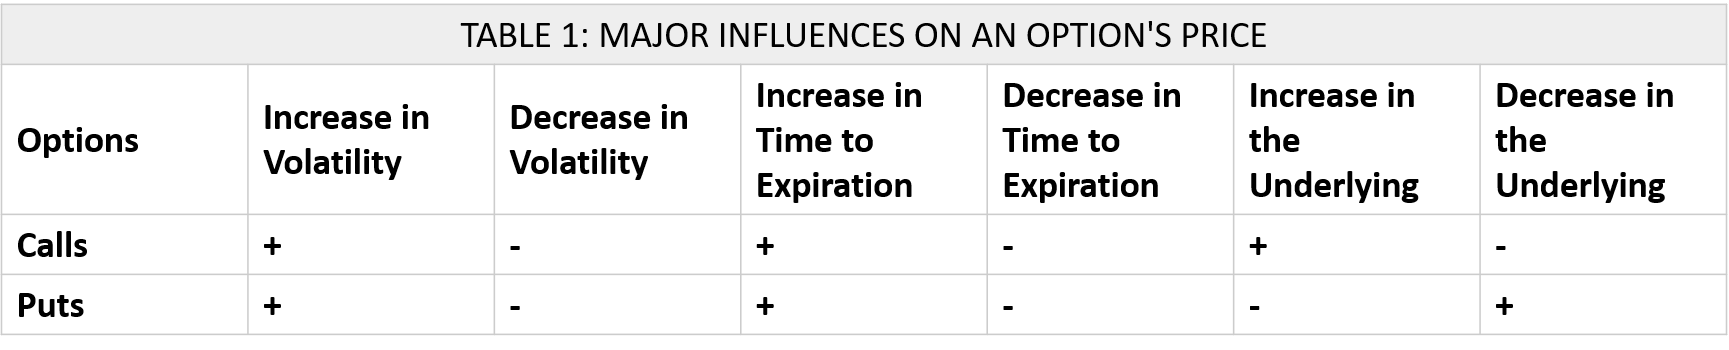



<b> Delta:
    
</b> Delta is a measure of the change in an option's price (that is, the premium of an option) resulting from a change in the underlying security. Puts generate negative delta because they have a negative relationship with the underlying security—that is, put premiums fall when the underlying security rises, and vice versa. Conversely, call options have a positive relationship with the price of the underlying asset. If the underlying asset's price rises, so does the call premium, provided there are no changes in other variables such as implied volatility or time remaining until expiration. If the price of the underlying asset falls, the call premium will also decline, provided all other things remain constant.

- Delta is commonly used when determining the likelihood of an option being in-the-money at expiration. For example, an out-of-the-money call option with a 0.20 delta has roughly a 20% chance of being in-the-money at expiration, whereas a deep-in-the-money call option with a 0.95 delta has a roughly 95% chance of being in-the-money at expiration.

<b> Gamma:

</b> While delta changes based on the underlying asset price, gamma is a constant that represents the rate of change of delta. This makes gamma useful for determining the stability of delta, which can be used to determine the likelihood of an option reaching the strike price at expiration.Another way to thing of gamma is the measure of the stability of an option’s probability. If delta represents the probability of being in-the-money at expiration, gamma represents the stability of that probability over time.

- For example, suppose that two options have the same delta value, but one option has a high gamma, and one has a low gamma. The option with the higher gamma will have a higher risk since an unfavorable move in the underlying asset will have an oversized impact. High gamma values mean that the option tends to experience volatile swings, which is a bad thing for most traders looking for predictable opportunities.

<b> Vega:

</b>Vega measures the  forward-looking expected volatility of the underlying asset price. While delta measures actual price changes, vega is focused on changes in expectations for future volatility. Higher volatility makes options more expensive since there’s a greater likelihood of hitting the strike price at some point. It’s important to remember that implied volatility reflects price action in the options market. When option prices are bid up because there are more buyers, implied volatility will increase.

<b> Theta:

</b>Theta measures the rate of time decay in the value of an option or its premium. Time decay represents the erosion of an option's value or price due to the passage of time. As time passes, the chance of an option being profitable or in-the-money lessens. Time decay tends to accelerate as the expiration date of an option draws closer because there's less time left to earn a profit from the trade.6

- Theta is always negative for a single option since time moves in the same direction. As soon as an option is purchased by a trader, the clock starts ticking, and the value of the option immediately begins to diminish until it expires, worthless, at the predefined expiration date.

<b>Rho:

</b>Rho measures sensitivity of the underlying to interest rates.

- As the stock price increases so does the value of Rho, for both puts and calls. As a stock becomes more expensive it will cost more to finance

- Short-term options are going to have a smaller Rho value compared to long-term options. As Interest rates don't typically move by substantial amounts in relatively short periods of time



<a id="references"><a/>
# 5. References

- [1] Hull, J. C. (2012). Options, Futures and Other Derivatives. Pearson.
- [2] Hilpisch, Y. (Date). Derivatives Analytics with Python. Wiley Financial Series 
- [3] https://en.wikipedia.org/wiki/Option_(finance)
- [4] https://finance.yahoo.com/quote/AAPL/options?strike=125&straddle=false

<a id="appendix"><a/>
# 6. Appendix (class development & reconciliation)

In [32]:
# Option Classes
#
#
import math
import scipy.stats as scs
# Class Definitions

class Option:
    ''' Black-Scholes-Merton European call option class.
    Attributes
    ==========
    option_type: str()
        classification of call/put option
    S0: float
        initial index level
    K: float
        strike price
    T: float
        time-to-maturity where T = t*
    r: float
        constant short rate
    vola: float
        constant volatility factor
    '''
    
    def __init__(self, option_type, S0, K, T, r, vola):
        ''' Initialization of Object. '''
        self.option_type = option_type
        self.S0 = S0
        self.K = K
        self.T = T
        self.r = r
        self.vola = vola
        
    def d1(self):
        ''' Helper function. '''
        d1 = ((math.log(self.S0 / self.K) +
                (self.r + 0.5 * self.vola ** 2) * self.T)
                / (self.vola * math.sqrt(self.T)))
        return d1

    def d2(self):
        ''' Helper function. '''
        d2 = ((math.log(self.S0 / self.K) +
                (self.r - 0.5 * self.vola ** 2) * self.T)
                / (self.vola * math.sqrt(self.T)))
        return d2    
    

    def value(self):
        ''' Method to value option. '''
        d1 = self.d1()
        d2 = self.d2()
        call_value = (self.S0 * scs.norm.cdf(d1, 0.0, 1.0)- self.K * math.exp(-self.r * self.T)* scs.norm.cdf(d2, 0.0, 1.0))
        put_value = (self.K * np.exp(-self.r * self.T) * scs.norm.cdf(-d2, 0.0, 1.0) - S * scs.norm.cdf(-d1, 0.0, 1.0))
        
        # put value function is now correct 
        #self.K * math.exp(-self.r * self.T)* scs.norm.cdf(-d2, 0.0, 1.0) - (self.S0 * scs.norm.cdf(-d1, 0.0, 1.0)) 
        #is there a misalignment on the return line
        if self.option_type == "call":                                                                                 
            return call_value   
        if  self.option_type == "put":
            return put_value                                                                                

    # Need to put value formula for a put option 
    
    
# Combine all the Greeks 

class Greeks(Option):
    ''' Black-Scholes-Merton class for the Greeks of European  option. '''   
    
    def delta(self):
        ''' Method to calculate the Delta of the European call option. '''
        d1 = self.d1()
        d2 = self.d2()                                                                                
        call_delta = scs.norm.cdf(d1, 0.0, 1.0)
        put_delta = -scs.norm.cdf(-d1, 0.0, 1.0) 
        if self.option_type == "call":
            return call_delta
        elif self.option_type == "put":
            return put_delta                                                                             
                                                                                         
    def gamma(self):
        ''' Method to calculate the Gamma of the European put option. '''
        d1 = self.d1()
        d2 = self.d2()
        call_gamma = scs.norm.pdf(d1, 0.0, 1.0) / (self.S0*self.vola*sqrt(self.T))                                                                                 
        put_gamma = scs.norm.pdf(d1, 0.0, 1.0) / (self.S0*self.vola*sqrt(self.T))
        if self.option_type == "call":
            return call_gamma
        elif self.option_type == "put":
            return put_gamma                                                                                                                                                                                                                                

    def theta(self):
        ''' Method to calculate the Theta of the European call option. '''
        d1 = self.d1()
        d2 = self.d2()
        call_theta = -(self.S0*scs.norm.pdf(d1, 0.0, 1.0))*self.vola/(2*sqrt(self.T))-self.r*exp(-self.r*self.T)*self.K*scs.norm.cdf(d2, 0.0, 1.0)
        put_theta = -(self.S0*scs.norm.pdf(d1, 0.0, 1.0))*self.vola/(2*sqrt(self.T))+self.r*exp(-self.r*self.T)*self.K*scs.norm.cdf(-d2, 0.0, 1.0)                                                                                    
        if self.option_type == "call":
            return call_theta
        elif self.option == "put":
            return put_theta                                                                                
                                                                                                                                                                     
    
    def rho(self):
        ''' Method to calculate the Rho of the European call option. '''
        d2 = self.d2()
        call_rho = self.K*self.T*exp(-self.r*self.T)*scs.norm.cdf(d2, 0.0, 1.0)
        put_rho = -self.K*self.T*exp(-self.r*self.T)*scs.norm.cdf(-d2, 0.0, 1.0)                                                                                     
        if self.option_type == "call":
            return call_rho
        elif self.option_type == "put":
            return put_rho                                                                             
   
    def vega(self):
        ''' Method to calculate the Vega of the European call option. '''
        d1 = self.d1()
        call_vega = self.S0 * scs.norm.pdf(d1, 0.0, 1.0) * math.sqrt(self.T)
        put_vega = self.S0 * scs.norm.pdf(d1, 0.0, 1.0) * math.sqrt(self.T)                                                                              
        if self.option_type == "call":
            return call_vega
        elif self.option == "put":
            return put_vega                                                                                   
             
